<a href="https://colab.research.google.com/github/mofanchang/AHEAD-interview-question/blob/main/ML_interview_question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction

####Problem Definition
The goal of the model is to predict whether a patient is COVID-19 positive or negative using their Flow Cytometry  data.

In [ ]:
pip install FlowCal

##Load Data

In [2]:
import os
import FlowCal
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def concat_FCSdata_FeatureName(filename):
    # Load the FCS file
    fcs_file = FlowCal.io.FCSData(filename)

    # View and store feature
    tuple_feature = fcs_file.channels
    list_feature = list(tuple_feature)

    # Convert the FCS data to DataFrame
    df = pd.DataFrame(fcs_file)
    df.columns = list_feature

    return df

# Read label information from Excel file
EU_label = pd.read_excel('/content/drive/MyDrive/EU_label.xlsx')
label = EU_label['label']
label_map = {
    'Sick': 1,
    'Healthy': 0,
}

# Specify the main directory containing subdirectories with FCS files
main_directory = "/content/drive/MyDrive/raw_fcs"

# Initialize an empty DataFrame to store concatenated data
final_df = pd.DataFrame()

# Initialize lists to store processed and unprocessed file paths
processed_files = []
unprocessed_files = []

# Recursively traverse through the main directory
for root, dirs, files in os.walk(main_directory):
    for file in files:
        if file.endswith(".fcs"):
            file_path = os.path.join(root, file)
            processed_files.append(file_path)  # Add to processed files list

            # Extract Patient ID from the filename
            Patient = os.path.basename(os.path.dirname(file_path))
            PatientID = StringIO(Patient)
            df_PatientID = pd.read_csv(PatientID)

            # Concatenate feature names and FCS data
            df = concat_FCSdata_FeatureName(file_path)

            # Find matching label for the current patient
            for index, row in EU_label.iterrows():
                if row['file_flow_id'] == Patient:
                    label_value = row['label']
                    label_int = label_map[label_value]
                    df['Patient_ID'] = Patient
                    df['COVID19'] = label_value
                    df['Label'] = label_int

                    # Concatenate the current patient data to the final DataFrame
                    final_df = pd.concat([final_df, df], ignore_index=True)

# Find unprocessed files by subtracting processed files from all files
all_files = []
for root, dirs, files in os.walk(main_directory):
    for file in files:
        if file.endswith(".fcs"):
            file_path = os.path.join(root, file)
            all_files.append(file_path)

unprocessed_files = list(set(all_files) - set(processed_files))

# Print unprocessed file paths
print("Unprocessed files:")
for file_path in unprocessed_files:
    print(file_path)

# Display the final DataFrame
print('Final DataFrame')
display(final_df)


Unprocessed files:
Final DataFrame


,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,FJComp-APC-A,FJComp-APC-H7-A,FJComp-APC-R700-A,FJComp-BB630-A,...,FJComp-BYG584-A,FJComp-BYG670-A,FJComp-BYG790-A,FJComp-FITC-A,FJComp-PE-CF594-A,FJComp-PE-Cy5.5-A,Time,Patient_ID,COVID19,Label
0,85016.500000,72034.179688,141938.000000,36644.562500,34746.667969,108497.812500,112.060295,73.952873,575.514587,50.510109,...,367.581573,204.302658,31.506687,-10.046371,96.860161,-10.614620,2.082766,flowrepo_covid_EU_038_flow_001,Sick,1
1,99848.312500,82380.554688,148984.828125,36342.511719,34517.816406,110496.539062,12.135560,-2.252536,1103.213257,-9.319699,...,389.542206,53.993160,36.968693,8196.370117,145.267517,-2.372972,2.098672,flowrepo_covid_EU_038_flow_001,Sick,1
2,87271.375000,70381.554688,149391.328125,102471.359375,95452.343750,124364.382812,-175.771729,34.822311,1798.449951,10.881639,...,622.587097,7.714994,72.636543,108.994469,597.781006,-97.149773,2.110145,flowrepo_covid_EU_038_flow_001,Sick,1
3,99559.828125,81619.625000,152953.578125,33188.042969,30318.783203,110333.085938,-12.676451,-62.132755,711.477234,13.103123,...,112.845123,249.754883,27.184982,299.286194,-0.004420,14.104618,2.126928,flowrepo_covid_EU_038_flow_001,Sick,1
4,91380.500000,74045.578125,152607.359375,43466.996094,42688.882812,110727.539062,25.795591,-65.608521,868.179382,20.005610,...,93.305313,58.850441,257.658386,159.822357,23.634172,-7.000971,2.135461,flowrepo_covid_EU_038_flow_001,Sick,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052715,112839.765625,98341.132812,142445.859375,29081.863281,27505.736328,105076.835938,6.316328,51.644669,942.212097,32.781143,...,445.735321,20.294441,-12.380395,77.997650,230.865921,147.672729,18717.740234,flowrepo_covid_EU_009_flow_001,Healthy,0
5052716,89548.960938,74433.585938,142836.250000,28729.320312,26998.513672,107352.179688,-47.678730,13.358541,964.234131,74.517166,...,363.565735,42.650570,29.225389,41.909229,-48.261032,96.216087,18718.947266,flowrepo_covid_EU_009_flow_001,Healthy,0
5052717,85100.273438,69878.351562,149342.781250,32437.927734,31116.955078,105052.789062,18.279118,42.405369,701.323181,98.870407,...,217.989502,120.296196,215.177963,206.483566,103.814499,162.783371,18719.769531,flowrepo_covid_EU_009_flow_001,Healthy,0
5052718,87624.460938,72880.015625,145184.968750,48090.003906,46063.785156,111395.398438,78.057076,17.310251,1029.988525,92.421181,...,375.092560,177.576324,407.668121,370.730530,77.303802,-7.522663,18720.822266,flowrepo_covid_EU_009_flow_001,Healthy,0


##Data Description


Based on the data provided for the Coefficient of Variation, several marker-channels including FJComp-APC-A, FJComp-APC-H7-A, FJComp-BB630-A, FJComp-BB700-P-A, FJComp-BUV395-A, FJComp-BUV563-A, FJComp-BUV615-P-A, FJComp-BUV737-A, FJComp-BUV805-A, FJComp-BV421-A, FJComp-BV480-A, FJComp-BV570-A, FJComp-BV605-A, FJComp-BV650-A, FJComp-BV711-A, FJComp-BV750-P-A, FJComp-BV786-A, FJComp-BYG584-A, FJComp-BYG670-A, FJComp-BYG790-A, FJComp-FITC-A, FJComp-PE-CF594-A, and FJComp-PE-Cy5.5-A exhibit notably high Coefficient of Variation ratios.

In [3]:
# Calculate DataFrame statistic
mean_values = df.mean()
std_deviations = df.std()
cv_values = (std_deviations / mean_values) * 100


print("Mean values for all columns:\n", mean_values)
print("Standard Deviations for all columns:\n", std_deviations)
print("Coefficient of Variations for all columns:\n", cv_values)


Mean values for all columns:
 FSC-A                 82001.953125
FSC-H                 66804.523438
FSC-W                147740.015625
SSC-A                 40892.261719
SSC-H                 37924.375000
SSC-W                110455.164062
FJComp-APC-A            128.814163
FJComp-APC-H7-A          23.571886
FJComp-APC-R700-A      1076.043945
FJComp-BB630-A          423.256958
FJComp-BB660-P-A       -304.446960
FJComp-BB700-P-A       1986.659546
FJComp-BB790-P-A        -34.921154
FJComp-BUV395-A       16703.392578
FJComp-BUV496-A         442.308990
FJComp-BUV563-A        2577.432129
FJComp-BUV615-P-A        60.766556
FJComp-BUV661-A       -1251.246460
FJComp-BUV737-A         830.537842
FJComp-BUV805-A         569.793762
FJComp-BV421-A          252.419617
FJComp-BV480-A          283.976776
FJComp-BV570-A          351.035797
FJComp-BV605-A           82.818970
FJComp-BV650-A          332.396729
FJComp-BV711-A          431.770111
FJComp-BV750-P-A        118.568512
FJComp-BV786-A           

<ipython-input-3-036cafda8778>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()
<ipython-input-3-036cafda8778>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_deviations = df.std()


###Clean Data
1.In this data two gates have been identified and labelled as Healthy and sick.

  These will now be relabelled as 0 and 1 respectively.


2.The dataset is also checked for null values.

In [4]:
# Check the missing values in the final DataFrame
missing_values = final_df.isnull().sum()
print("Missing values in the final DataFrame:")
print(missing_values)

Missing values in the final DataFrame:
FSC-A                0
FSC-H                0
FSC-W                0
SSC-A                0
SSC-H                0
SSC-W                0
FJComp-APC-A         0
FJComp-APC-H7-A      0
FJComp-APC-R700-A    0
FJComp-BB630-A       0
FJComp-BB660-P-A     0
FJComp-BB700-P-A     0
FJComp-BB790-P-A     0
FJComp-BUV395-A      0
FJComp-BUV496-A      0
FJComp-BUV563-A      0
FJComp-BUV615-P-A    0
FJComp-BUV661-A      0
FJComp-BUV737-A      0
FJComp-BUV805-A      0
FJComp-BV421-A       0
FJComp-BV480-A       0
FJComp-BV570-A       0
FJComp-BV605-A       0
FJComp-BV650-A       0
FJComp-BV711-A       0
FJComp-BV750-P-A     0
FJComp-BV786-A       0
FJComp-BYG584-A      0
FJComp-BYG670-A      0
FJComp-BYG790-A      0
FJComp-FITC-A        0
FJComp-PE-CF594-A    0
FJComp-PE-Cy5.5-A    0
Time                 0
Patient_ID           0
COVID19              0
Label                0
dtype: int64


##Exploratory Data Analysis

###Box plot disitrubtion


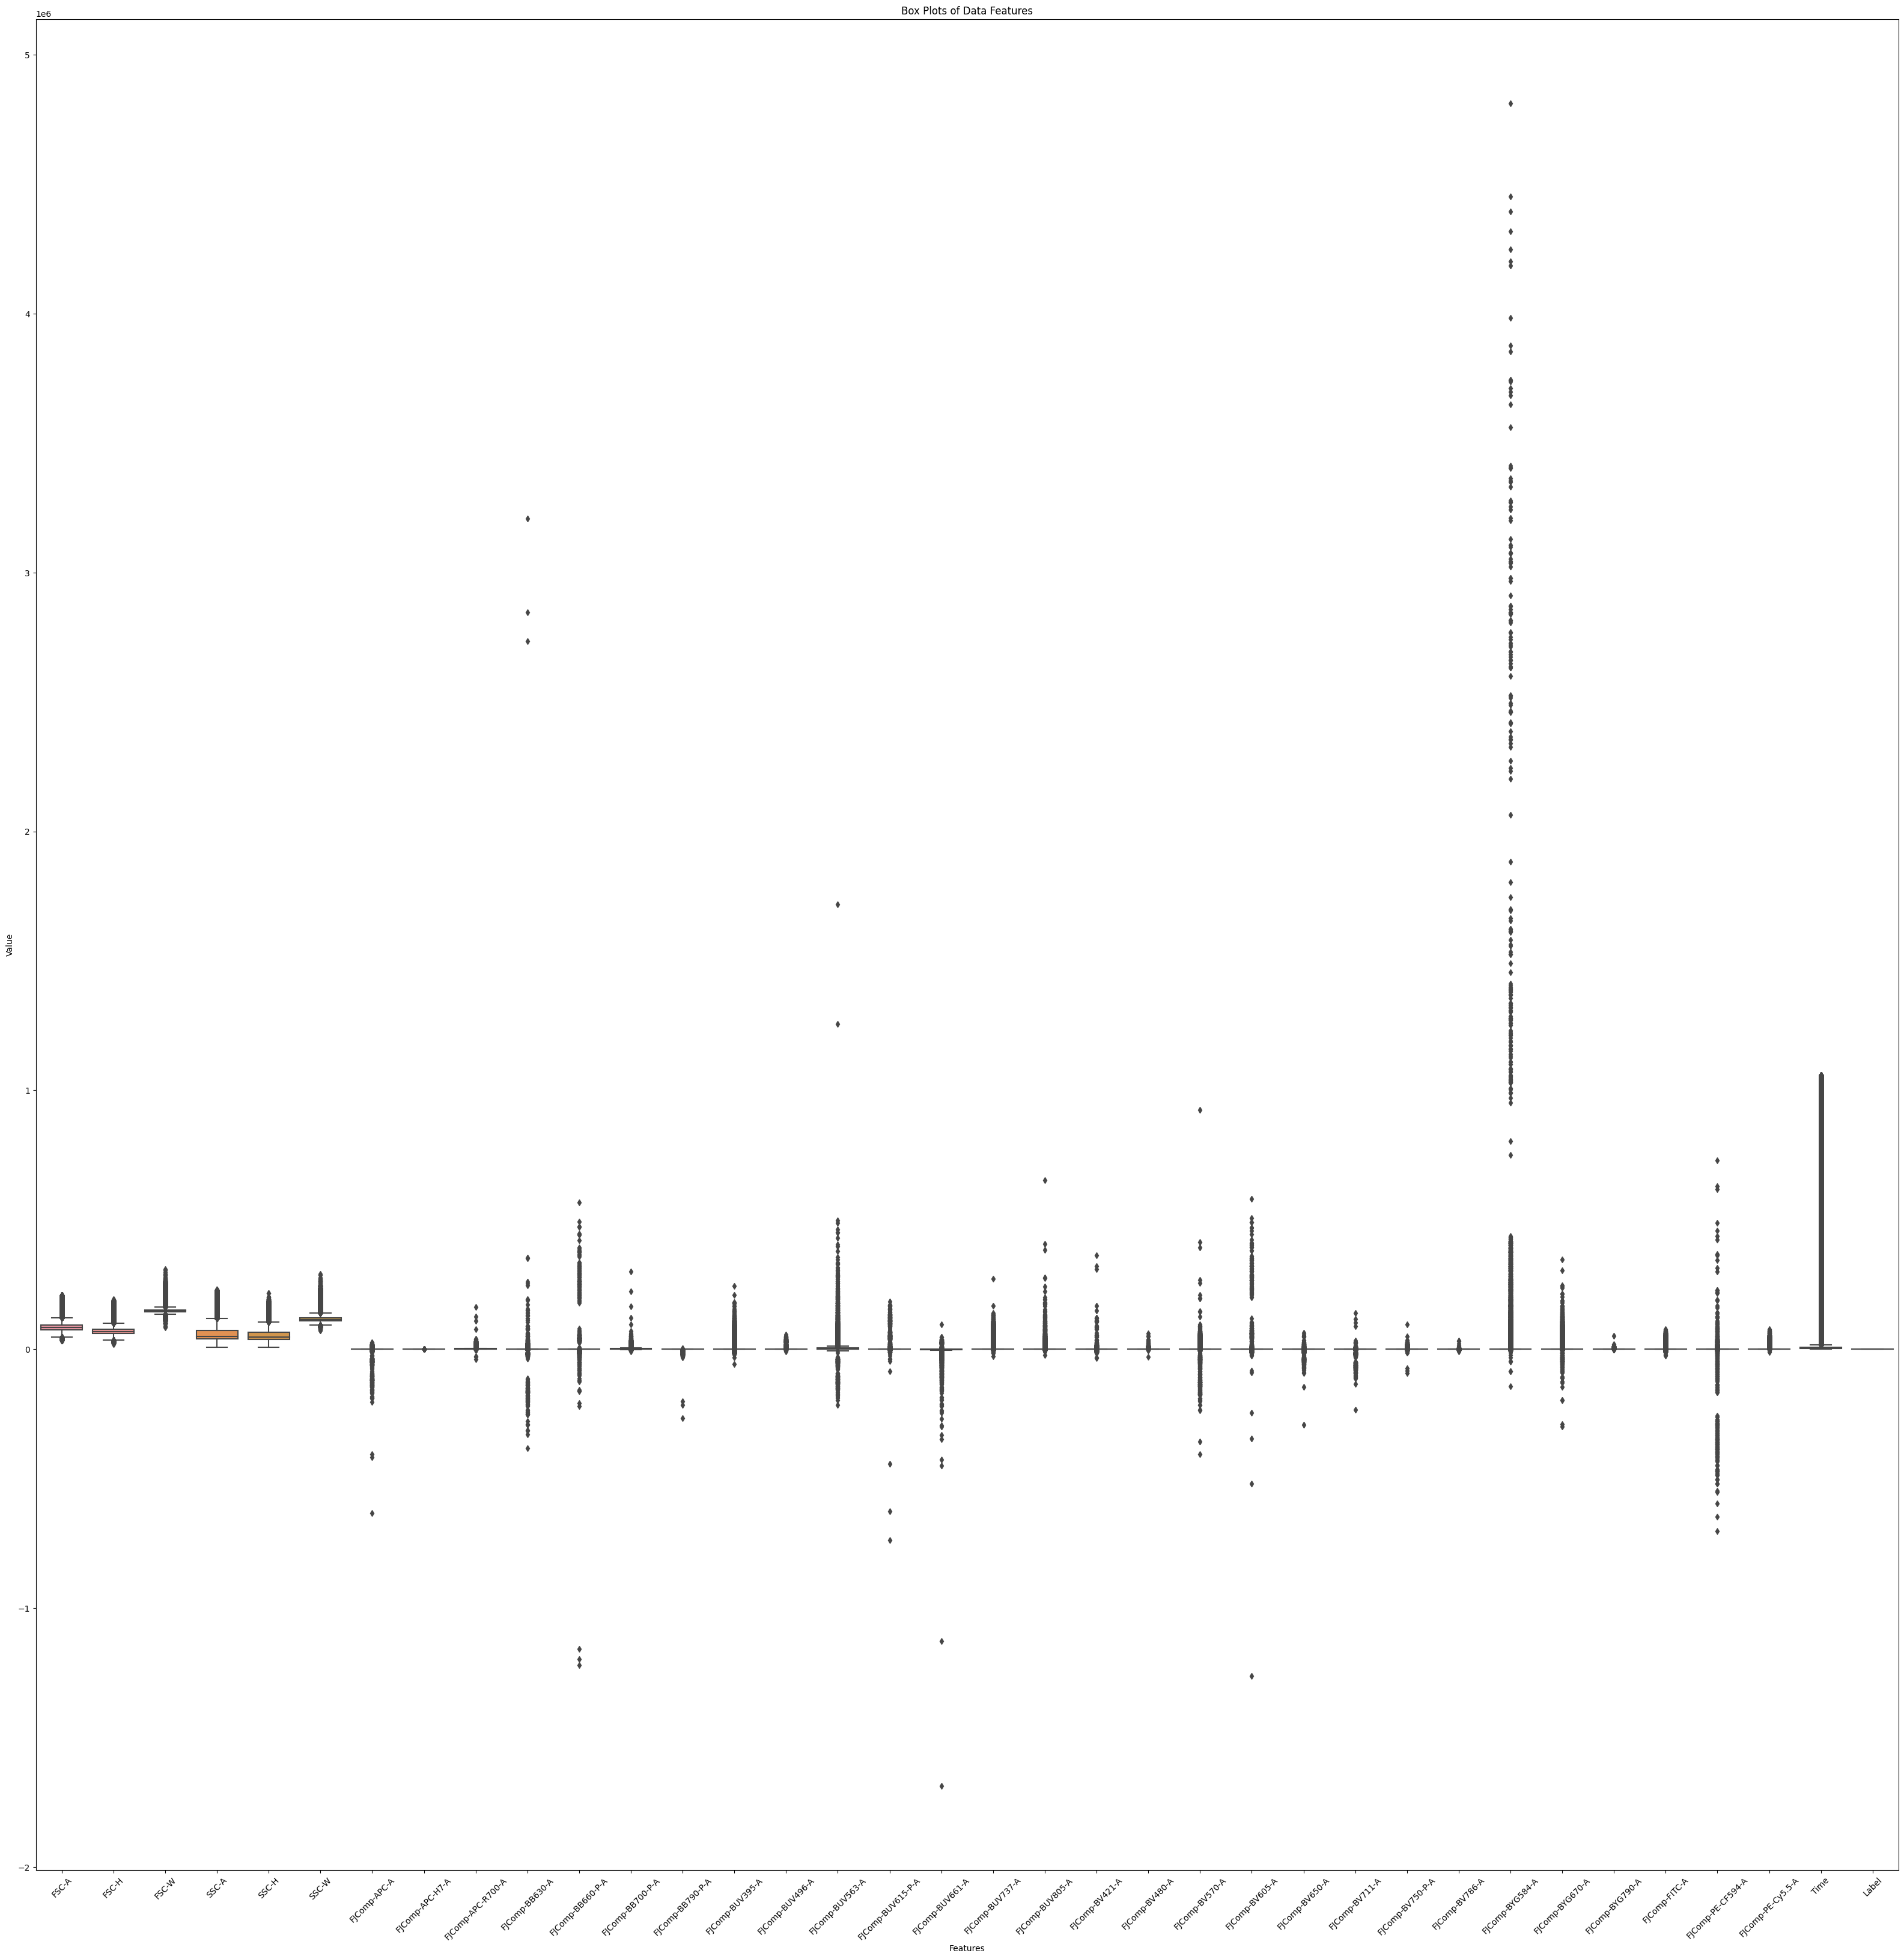

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a pandas DataFrame (assuming you have already loaded your data)
df =final_df

# Plot box plots for each feature
def plot_boxplots(data):
    plt.figure(figsize=(40, 40))
    sns.boxplot(data=data)
    plt.xlabel("Features")
    plt.ylabel("Value")
    plt.title("Box Plots of Data Features")
    plt.xticks(rotation=45)
    plt.show()

# Explore data distribution using histograms and box plots
# plot_histograms(df)
plot_boxplots(df)


###Cross martix
Based on the cross matrix, it can be observed that there is a strong positive correlation of 0.84 between the features "FJComp-BYG584-A" and "FJComp-BV605-A".


<ipython-input-6-d29b7413c44c>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = positive_samples.corr()


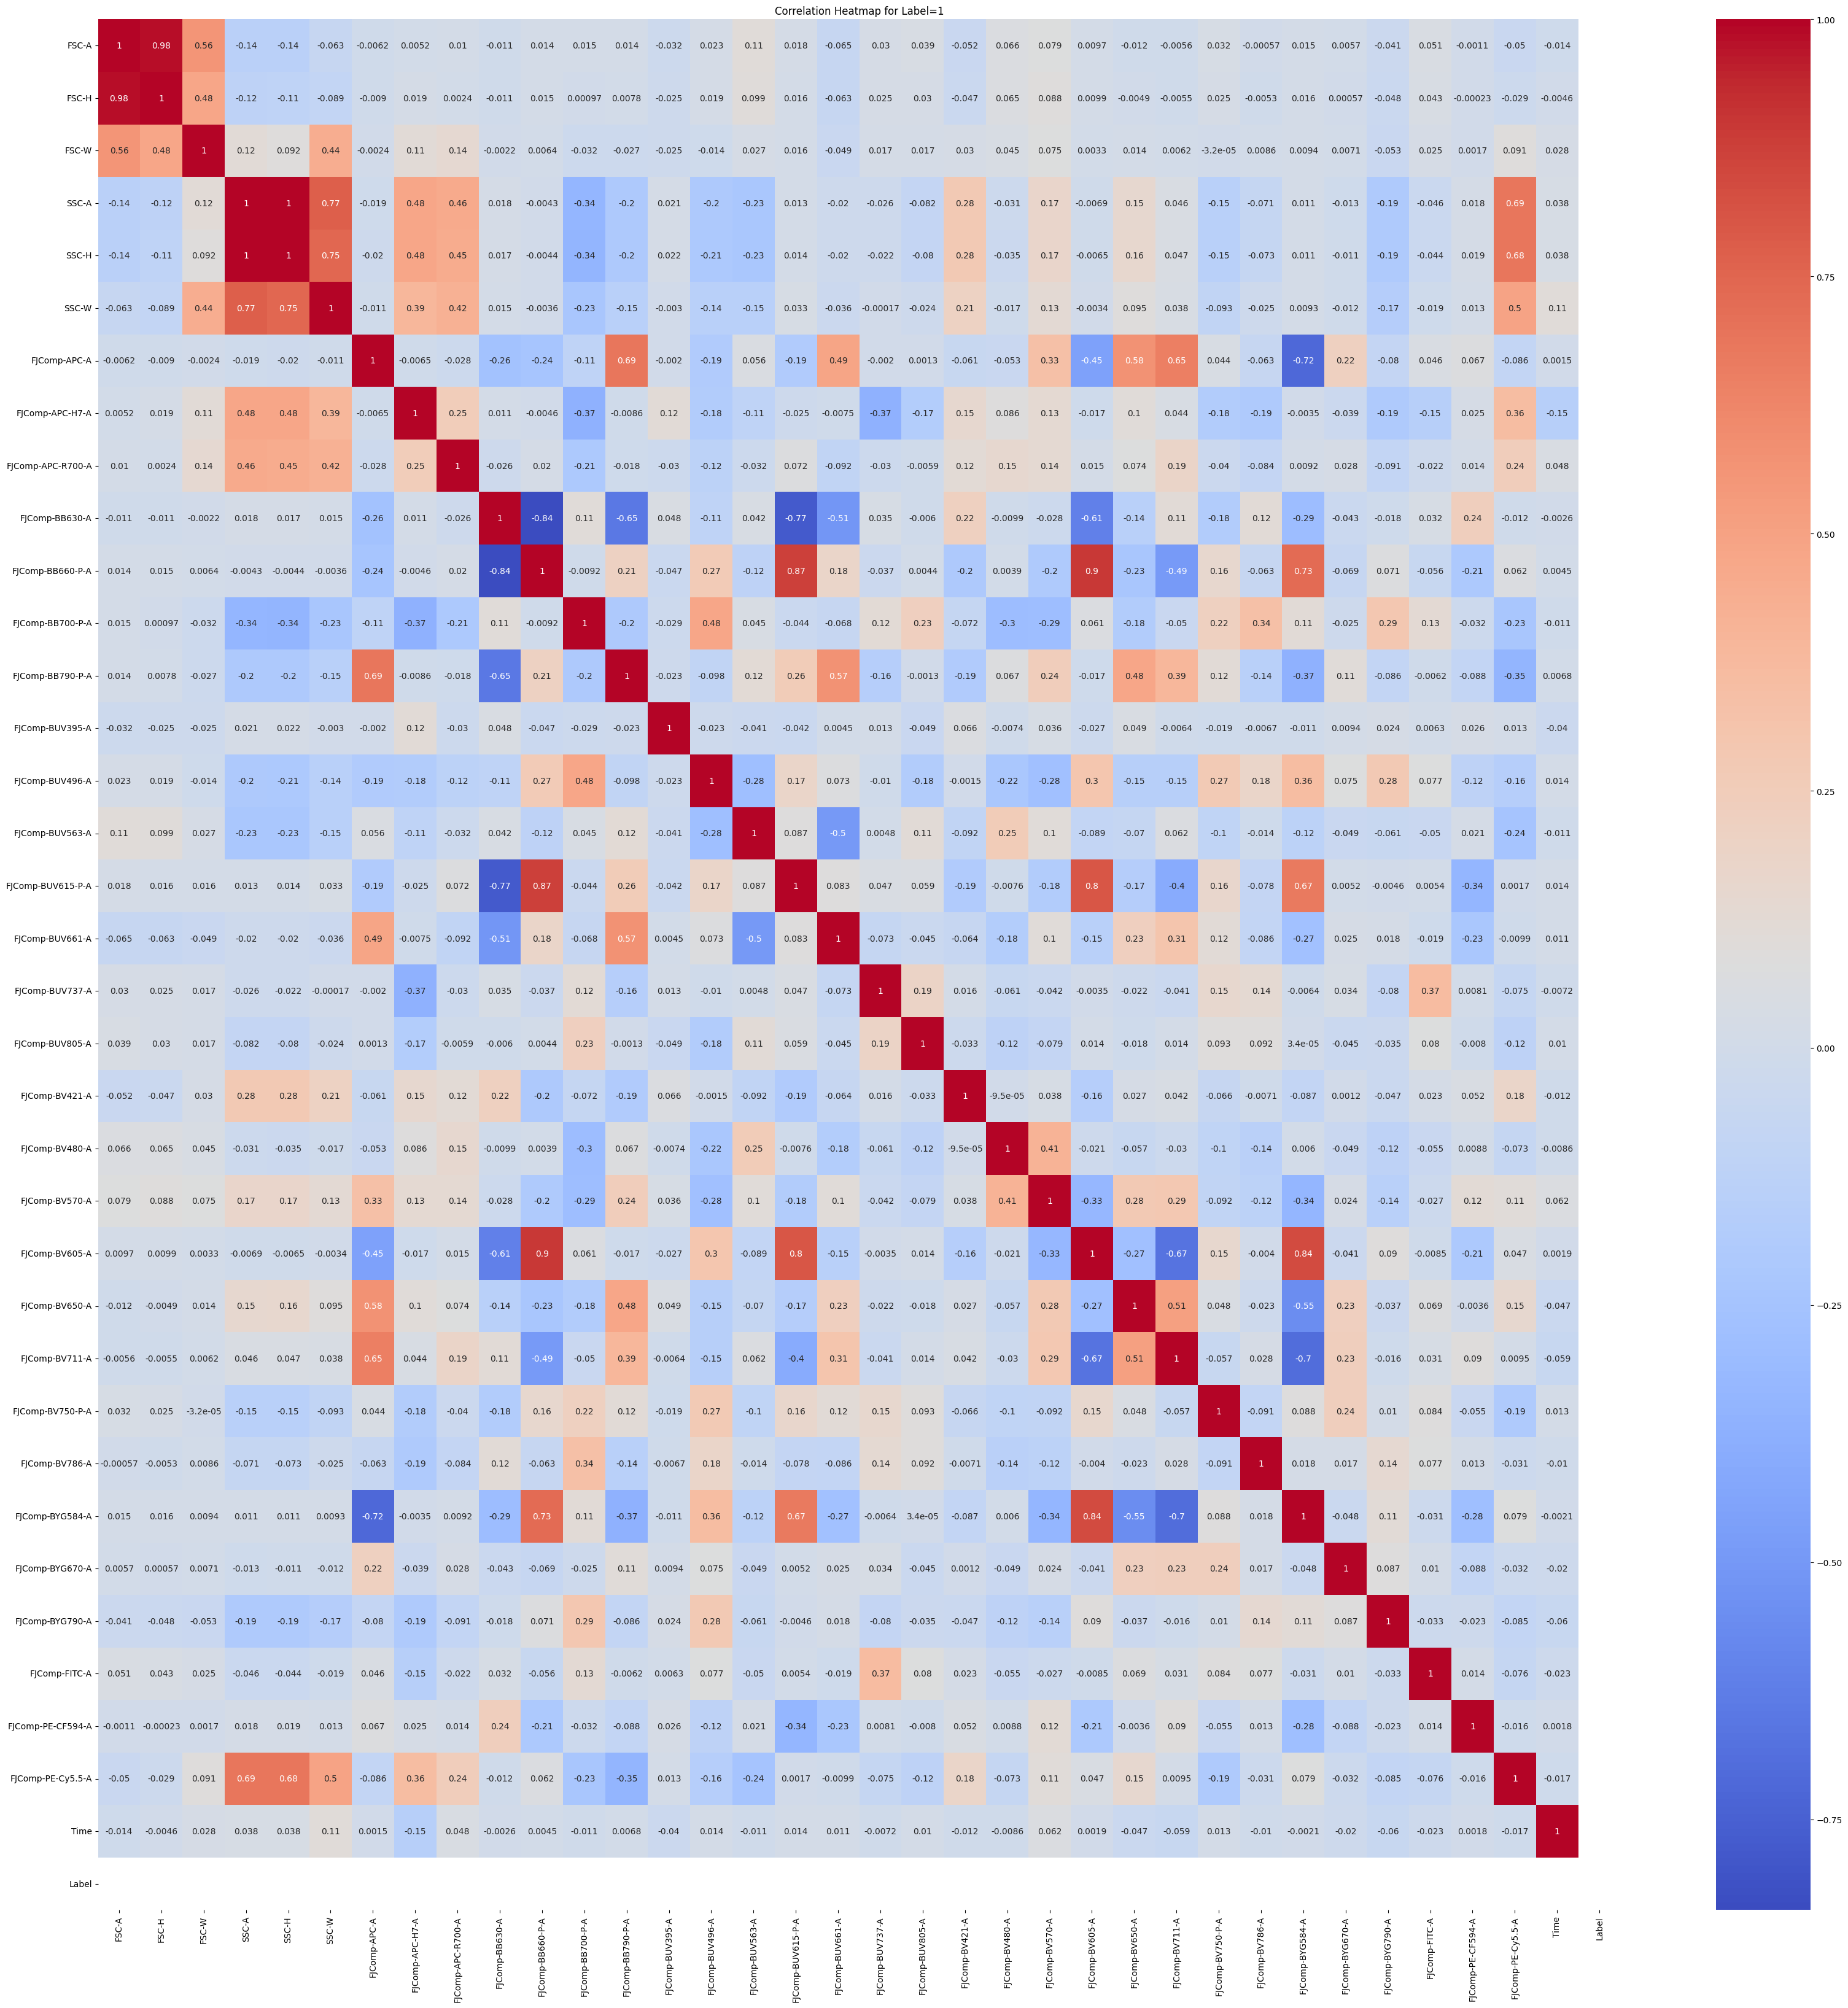

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = final_df

# Filter the DataFrame to include only positive samples (Label=1)
positive_samples = df[df['Label'] == 1]

# Calculate the correlation matrix
correlation_matrix = positive_samples.corr()

# Plot a heatmap
def plot_correlation_heatmap(correlation_matrix):
    plt.figure(figsize=(40, 40))  # Adjust the figure size as needed
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap for Label=1")
    plt.show()

# Call the correlation heatmap function
plot_correlation_heatmap(correlation_matrix)



##Initialize the MinMaxScaler

Based on the elevated CV ratios in the specified marker-channels and the wide data distribution observed in FJComp-APC-A, FJComp-APC-H7-A, FJComp-BB630-A, FJComp-BB700-P-A, FJComp-BUV395-A, FJComp-BUV563-A, FJComp-BUV615-P-A, FJComp-BUV737-A, FJComp-BUV805-A, FJComp-BV421-A, FJComp-BV480-A, FJComp-BV570-A, FJComp-BV605-A, FJComp-BV650-A, FJComp-BV711-A, FJComp-BV750-P-A, FJComp-BV786-A, FJComp-BYG584-A, FJComp-BYG670-A, FJComp-BYG790-A, FJComp-FITC-A, FJComp-PE-CF594-A, and FJComp-PE-Cy5.5-A the implementation of normalization use MinMaxScaler.

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load data
df = final_df

# Select the columns to normalize
selected_columns = ['FJComp-APC-A', 'FJComp-APC-H7-A', 'FJComp-BB630-A', 'FJComp-BB700-P-A', 'FJComp-BUV395-A',
                    'FJComp-BUV563-A', 'FJComp-BUV615-P-A', 'FJComp-BUV737-A', 'FJComp-BUV805-A', 'FJComp-BV421-A',
                    'FJComp-BV480-A', 'FJComp-BV570-A', 'FJComp-BV605-A', 'FJComp-BV650-A', 'FJComp-BV711-A',
                    'FJComp-BV750-P-A', 'FJComp-BV786-A', 'FJComp-BYG584-A', 'FJComp-BYG670-A', 'FJComp-BYG790-A',
                    'FJComp-FITC-A', 'FJComp-PE-CF594-A', 'FJComp-PE-Cy5.5-A']

# Extract the selected columns for normalization
column_data = df[selected_columns].values

# Convert the data to np.float32
column_data = column_data.astype(np.float32)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns' data
normalized_column_data = scaler.fit_transform(column_data)

print("Min:", np.min(normalized_column_data))
print("Max:", np.max(normalized_column_data))

# Create a new DataFrame with normalized values and original index/column names
normalized_df = pd.DataFrame(normalized_column_data, columns=selected_columns, index=df.index)

# Update the original DataFrame with normalized values
df[selected_columns] = normalized_df


Min: 0.0
Max: 1.0000001


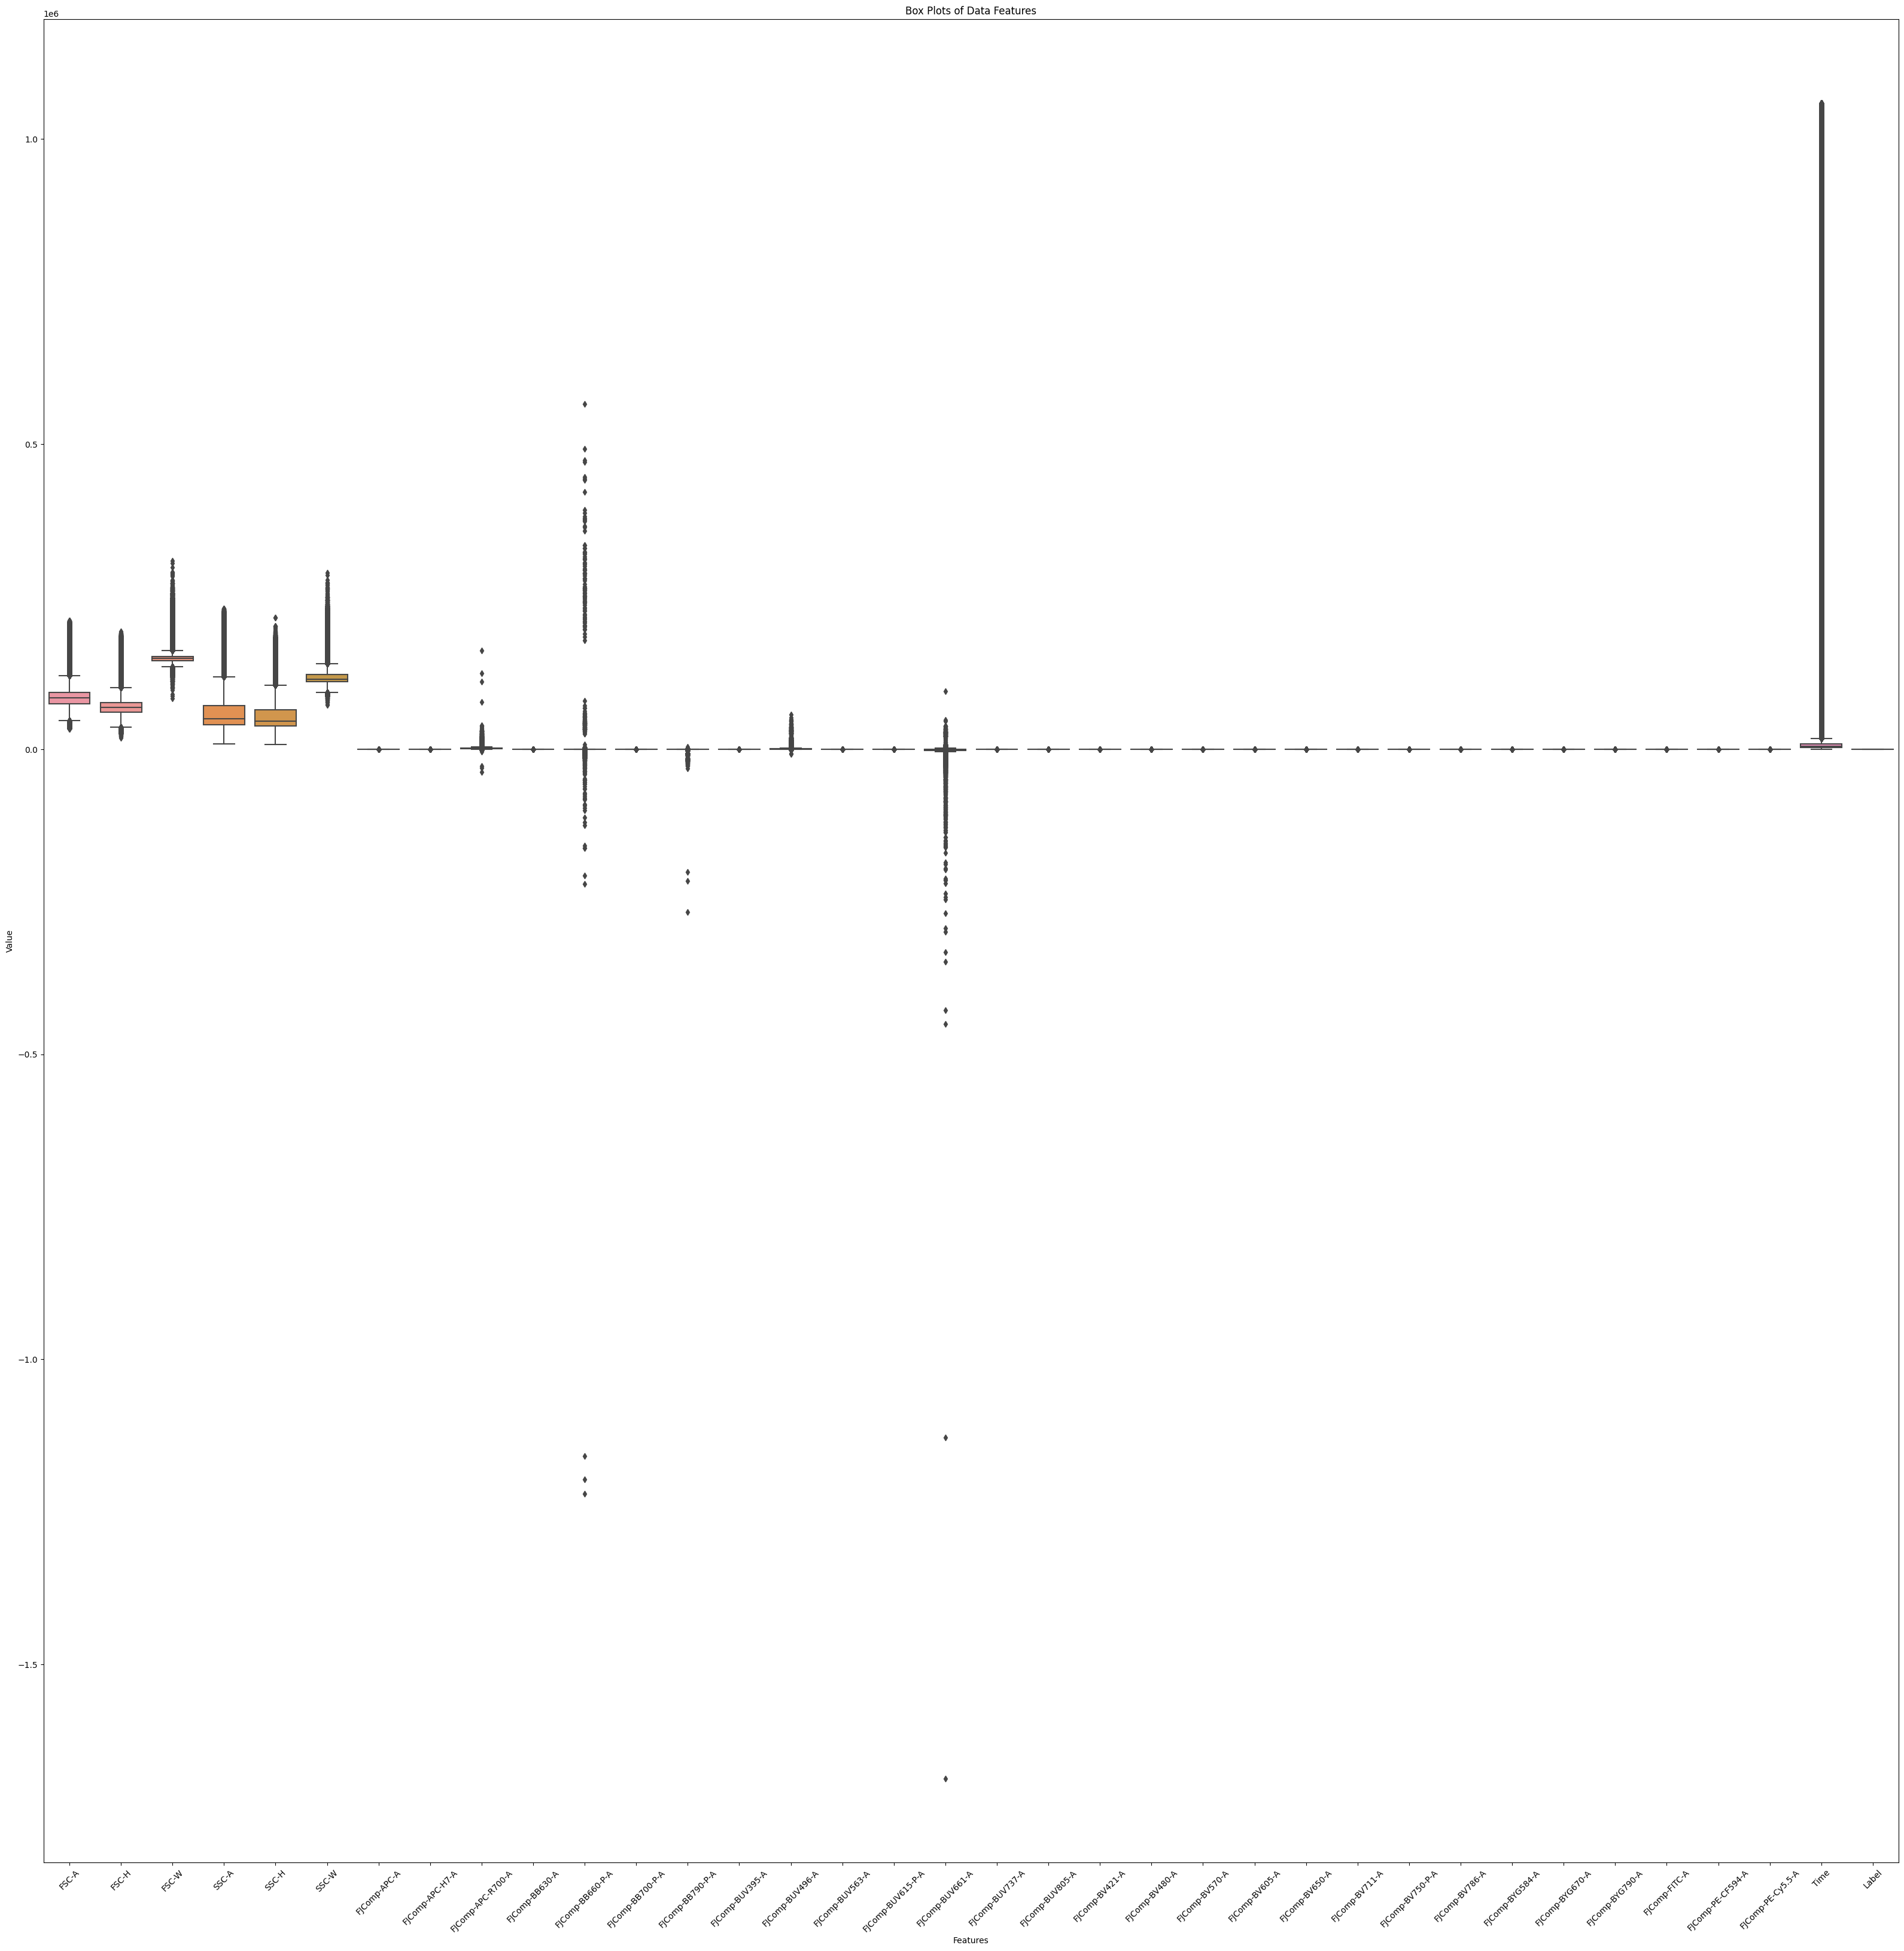

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load data
df =final_df


# Plot box plots for each feature
def plot_boxplots(data):
    plt.figure(figsize=(40, 40))
    sns.boxplot(data=data)
    plt.xlabel("Features")
    plt.ylabel("Value")
    plt.title("Box Plots of Data Features")
    plt.xticks(rotation=45)
    plt.show()


# plot_histograms(df)
plot_boxplots(df)


##Supervised Classification Methods

###DecisionTreeClassifier

In [10]:
X = final_df.drop(['Label','COVID19','Patient_ID'], axis=1)
y = final_df["Label"]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [13]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7747325532914285
Confusion Matrix:
 [[329591 166752]
 [174712 844761]]


Logistic Regression Confusion Matrix

Confusion Matrix, without Normalization


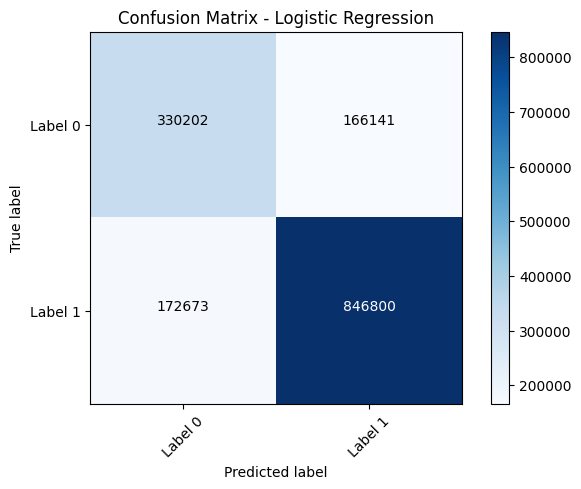

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

logreg_conf_matrix = np.array([[330202,166141],
                               [172673, 846800]])

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, without Normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 假設有兩個類別 0 和 1
class_names = ['Label 0', 'Label 1']

# 繪製混淆矩陣圖表
plt.figure()
plot_confusion_matrix(logreg_conf_matrix, classes=class_names, title='Confusion Matrix - Logistic Regression')
plt.show()


###LogisticRegression & Multi Layer Perceptron

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# Split the data into features (X) and target (y)
X = final_df.drop(['Label', 'COVID19', 'Patient_ID'], axis=1)
y = final_df["Label"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Initialize and train Logistic Regression classifier
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
logreg_pred = logreg_clf.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)


# Initialize and train Multi Layer Perceptron classifier
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train)
mlp_pred = mlp_clf.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)

# Print accuracy scores for each model
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Multi Layer Perceptron Accuracy:", mlp_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6711078389461518
Multi Layer Perceptron Accuracy: 0.6725572233041477


In [18]:
# Calculate accuracy, confusion matrix, and classification report for Logistic Regression
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)


print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)


Logistic Regression Confusion Matrix:
 [[ 34325 462018]
 [ 36522 982951]]


Logistic Regression Confusion Matrix

Confusion Matrix, without Normalization


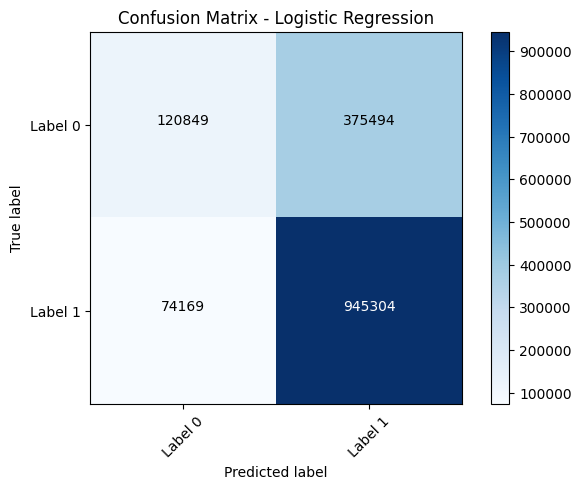

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


logreg_conf_matrix = np.array([[120849, 375494],
                               [74169, 945304]])

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, without Normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 假設有兩個類別 0 和 1
class_names = ['Label 0', 'Label 1']

# 繪製混淆矩陣圖表
plt.figure()
plot_confusion_matrix(logreg_conf_matrix, classes=class_names, title='Confusion Matrix - Logistic Regression')
plt.show()
